<a href="https://colab.research.google.com/github/nksubramanian/Concurrency/blob/main/Copy_of_Surg_instruments_inference_gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inference from a saved model

In [ ]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh
!bash icevision_install.sh cuda11 master

--2022-10-28 11:37:39--  https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2820 (2.8K) [text/plain]
Saving to: ‘icevision_install.sh.4’

icevision_install.s 100%[===================>]   2.75K  --.-KB/s    in 0s      

2022-10-28 11:37:39 (52.5 MB/s) - ‘icevision_install.sh.4’ saved [2820/2820]

Installing icevision + dependencices for cuda11
- Installing torch and its dependencies
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
- Installing mmcv
- Installing mmdet
- Installing mmseg
- Installing icevision from master
- Installing icedata from master
Looking in ind

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [ ]:
import icevision

In [ ]:
from icevision.all import *

In [ ]:
print('icevision v',icevision.__version__)
print('torch v',torch.__version__)
print('torchvision v',torchvision.__version__)

icevision v 0.12.0
torch v 1.10.0+cu111
torchvision v 0.11.1+cu111


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
root_dir = Path('/content/gdrive/My Drive/')

In [ ]:
#!git clone https://github.com/yrodriguezmd/Surgical_instruments.git

In [ ]:
classes = ['Army_navy', 'Bulldog', 'Castroviejo','Forceps', 'Frazier', 'Hemostat','Iris','Mayo_metz','Needle','Potts','Richardson','Scalpel','Towel_clip', 'Weitlaner','Yankauer']
class_map = ClassMap(classes)
len(class_map)

16

In [ ]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

from icevision.models.checkpoint import *

model_type = models.mmdet.vfnet ##
backbone = model_type.backbones.resnet50_fpn_mstrain_2x##

In [ ]:
!ls gdrive/MyDrive/Surgical_instruments/Models

notebooks  README.md  VFNet_teacher_nov29_mAP82.6.pth


In [ ]:
from icevision.models import *

checkpoint_path = root_dir/'Surgical_instruments/Models/VFNet_teacher_nov29_mAP82.6.pth' 

checkpoint_and_model = model_from_checkpoint(checkpoint_path)

model_loaded = checkpoint_and_model["model"]

load checkpoint from local path: /content/gdrive/My Drive/Surgical_instruments/Models/VFNet_teacher_nov29_mAP82.6.pth


/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
2022-10-28 11:40:11,503 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2022-10-28 11:40:11,505 - mmcv - INFO - load model from: torchvision://resnet50
2022-10-28 11:40:11,508 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
2022-10-28 11:40:11,618 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2022-10-28 11:40:11,648 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2022-10-28 11:40:11,678 - mmcv - INFO - initialize VFNetHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01, 'override': {'type': 'No

In [ ]:
!ls gdrive/MyDrive/Surgical_instruments/Second_set.v1i.coco

ls: cannot access 'gdrive/MyDrive/Surgical_instruments/Second_set.v1i.coco': No such file or directory


In [ ]:
path = Path('gdrive/MyDrive/Surgical_instruments/Sets/Second_set') # 

test_parser = parsers.COCOBBoxParser(
    annotations_filepath = path/'test/_annotations.coco.json',
    img_dir = path/'test')


whole = SingleSplitSplitter()

test_records, *_ = test_parser.parse(data_splitter = whole)

#show_records(test_records[0:3],ncols=3, font_size=30, label_color = '#ffff00')

  0%|          | 0/19 [00:00<?, ?it/s]

FileNotFoundError: ignored

In [ ]:
img_size = checkpoint_and_model["img_size"]

valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

#infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map = class_map)
infer_ds = Dataset(test_records, valid_tfms)#, class_map = class_map)

In [ ]:
infer_dl = model_type.infer_dl(infer_ds, 
                               batch_size=4, shuffle=False)

preds_saved_test = model_type.predict_from_dl(model_loaded,#
                                              infer_dl,
                                          keep_images=True, 
                                         detection_threshold = 0.5) ##

  0%|          | 0/5 [00:00<?, ?it/s]

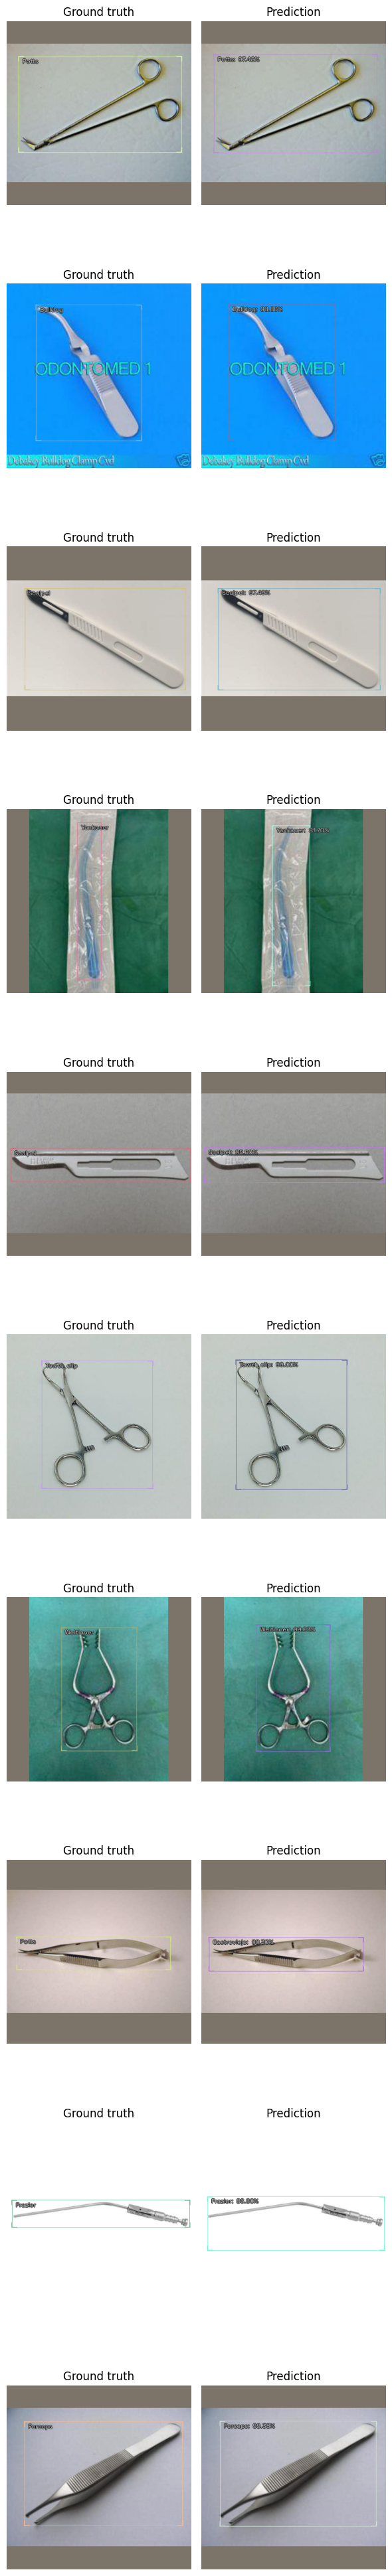

In [ ]:
show_preds(preds = preds_saved_test[0:10])
# with detection threshold 0.5

Gradio deployment using saved model

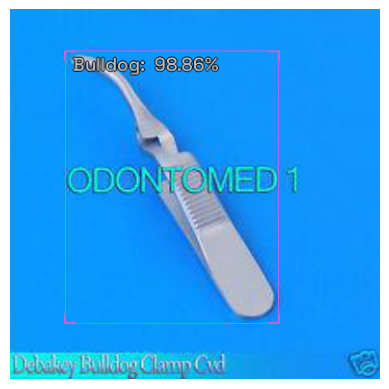

BaseRecord

common: 
	- Img: 384x384x3 <np.ndarray> Image
	- Image size ImgSize(width=384, height=384)
	- Record ID: 1
detection: 
	- Scores: [    0.98859]
	- BBoxes: [<BBox (xmin:57.6265869140625, ymin:43.13243103027344, xmax:278.380615234375, ymax:326.5138244628906)>]
	- Class Map: <ClassMap: {'background': 0, 'Army_navy': 1, 'Bulldog': 2, 'Castroviejo': 3, 'Forceps': 4, 'Frazier': 5, 'Hemostat': 6, 'Iris': 7, 'Mayo_metz': 8, 'Needle': 9, 'Potts': 10, 'Richardson': 11, 'Scalpel': 12, 'Towel_clip': 13, 'Weitlaner': 14, 'Yankauer': 15}>
	- Labels: [2]

In [ ]:
show_sample(preds_saved_test[1])
preds_saved_test[1].pred

In [ ]:

!echo "- Installing gradio"
!pip install gradio -U -q
import icedata
import PIL, requests
import torch
from torchvision import transforms
import gradio as gr

def show_preds_gradio(input_image, display_label, display_bbox, detection_threshold):

    if detection_threshold==0: detection_threshold=0.5

    img = PIL.Image.fromarray(input_image, 'RGB')

    pred_dict  = model_type.end2end_detect(img, 
                                           valid_tfms, 
                                           model_loaded, ## 
                                           class_map=class_map, 
                                           detection_threshold=detection_threshold,
                                           display_label=display_label, 
                                           display_bbox=display_bbox, 
                                           return_img=True, 
                                           font_size=16, 
                                           label_color="#FF59D6")

    return pred_dict['img']

- Installing gradio


In [ ]:
display_chkbox_label = gr.inputs.Checkbox(label="Label", default=True)
display_chkbox_box = gr.inputs.Checkbox(label="Box", default=True)

detection_threshold_slider = gr.inputs.Slider(minimum=0, maximum=1, step=0.1, default=0.5, label="Detection Threshold")

outputs = gr.outputs.Image()

# Option 1: Get an image from local drive

gr_interface = gr.Interface(fn=show_preds_gradio, inputs=["image", display_chkbox_label, display_chkbox_box,  detection_threshold_slider], outputs=outputs, title='IceApp - COCO')

In [ ]:
gr_interface.launch(inline=False, share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://70a58e2cd23cf15d.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f57fcbc0e50>,
 'http://127.0.0.1:7860/',
 'https://70a58e2cd23cf15d.gradio.app')

ValueError: ignored